In [78]:
#importing different libraries for data manupulation

import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [79]:
#importing train and test dataset

df_train=pd.read_csv("Train_Set.csv",parse_dates=["week_start_date"])
df_test=pd.read_csv("Test_Set.csv",parse_dates=["week_start_date"])

In [80]:
#Checking the shape of both train and test data

df_train.shape , df_test.shape

((114706, 65), (29620, 65))

In [81]:
#Creating a function to display entire features

def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100):
        display(df)   

In [82]:
display_all(df_train.head())

,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,Label
0,100559.0,2018-09-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,101026.0,2018-09-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,101026.0,2018-09-10,0.0,0.0,86.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,18.666667,0.0,3.000000,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,0.0,0.0,0.666667,84.666667,0.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,101026.0,2018-09-17,0.0,0.0,-0.076046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067797,0.0,-0.250000,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.300000,0.0,0.0,-0.400000,-0.194553,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,101026.0,2018-09-24,0.0,0.0,-0.987654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,-0.5,-0.952381,0.0,-0.666667,-0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.571429,0.0,0.0,0.000000,-0.985507,0.0,0.0,0.0,0.0,0.0,-0.812500,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [83]:
#Creating a DataFrame to Check for missing values

missing_df=pd.DataFrame()
missing_df['Features']=df_train.isnull().sum().keys()
missing_df['Values']=df_train.isnull().sum().values.tolist()
missing_df[missing_df['Values']>0]

,Features,Values


In [84]:
#Checking number of accounts

df_train['account_id'].nunique()

2690

In [85]:
#Seperating features and account info

df_account=df_train[['account_id','week_start_date','Label']]
df_features=df_train.drop(['account_id','week_start_date','Label'],axis=1)

#### EDA on Account Ids

In [86]:
#Creating new features from ['week_start_date']

df_account['year']=df_account['week_start_date'].dt.year

df_account['month']=df_account['week_start_date'].dt.month

df_account['week']=df_account['week_start_date'].dt.week

df_account['day']=df_account['week_start_date'].dt.day

df_account['dayofyear']=df_account['week_start_date'].dt.dayofyear

In [87]:
df_account.head()

,account_id,week_start_date,Label,year,month,week,day,dayofyear
0,100559.0,2018-09-03,0,2018,9,36,3,246
1,101026.0,2018-09-03,0,2018,9,36,3,246
2,101026.0,2018-09-10,0,2018,9,37,10,253
3,101026.0,2018-09-17,0,2018,9,38,17,260
4,101026.0,2018-09-24,0,2018,9,39,24,267


In [88]:
#Number of times an accounts logged in Year 2019 (Top 10)
df_account[df_account['year']==2019].account_id.value_counts().sort_values(ascending=False).drop_duplicates().iloc[:10]

100962.0    200
105956.0    192
105810.0    188
100627.0    186
101799.0    182
106052.0    180
100723.0    178
101386.0    176
101120.0    170
108248.0    164
Name: account_id, dtype: int64

In [89]:
#Number of times an accounts logged in Year 2020 (Top 10)
df_account[df_account['year']==2018].account_id.value_counts().sort_values(ascending=False).drop_duplicates().iloc[:10]

101676.0    72
170720.0    70
101386.0    68
108765.0    64
104959.0    62
100879.0    60
104138.0    56
105242.0    54
105956.0    52
103024.0    50
Name: account_id, dtype: int64

In [90]:
#Checking change in Label in each Year
print("Year 2018")
print(df_account[df_account['year']==2018].Label.value_counts())
print("Year 2019")
print(df_account[df_account['year']==2019].Label.value_counts())
print("Year 2020")
print(df_account[df_account['year']==2020].Label.value_counts())

Year 2018
0    12496
1      178
Name: Label, dtype: int64
Year 2019
0    67182
1      771
Name: Label, dtype: int64
Year 2020
0    33952
1      127
Name: Label, dtype: int64


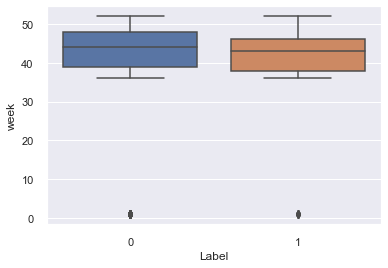

In [91]:
#Checking label for each week in year 2018
sns.boxplot(x=df_account[df_account['year']==2018]['Label'],
            y=df_account[df_account['year']==2018]['week'])

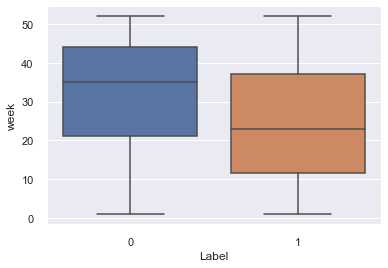

In [92]:
#Checking label for each week in year 2019
sns.boxplot(x=df_account[df_account['year']==2019]['Label'],
            y=df_account[df_account['year']==2019]['week'])

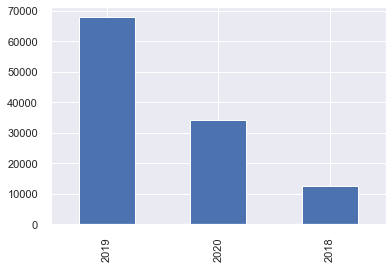

In [93]:
df_account['year'].value_counts().plot.bar()

In [94]:
#Creating categories of year
df_account['cat_year']=df_account['year'].map({2018:1,2019:2,2020:3})

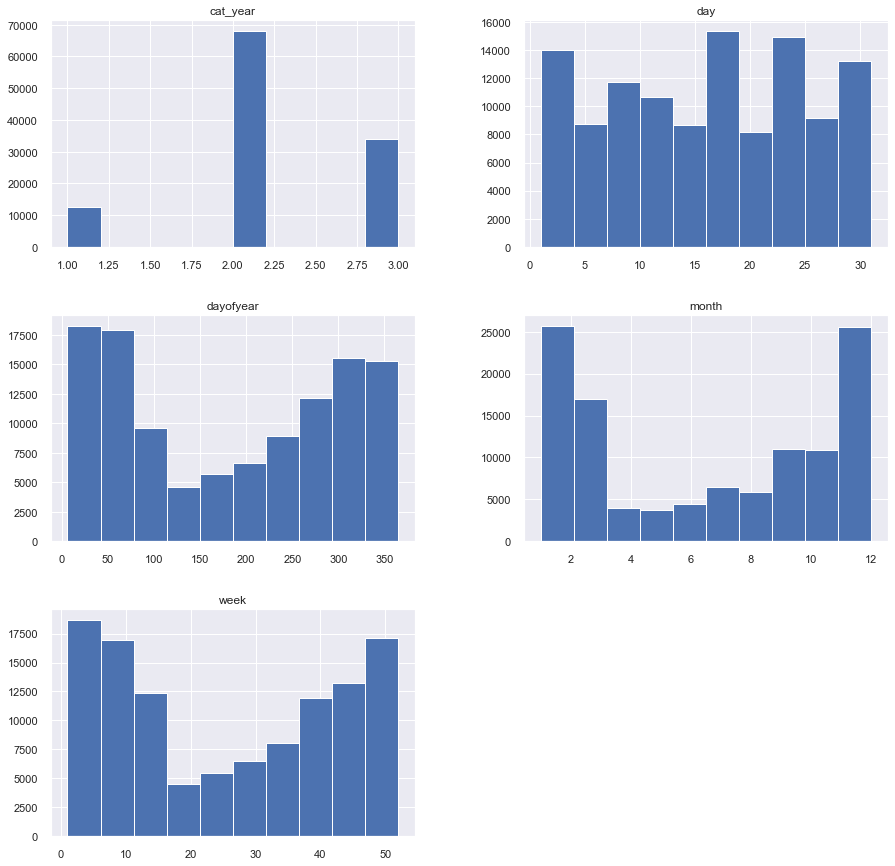

In [95]:
#VIsualizing data distribution of new features created

df_account.drop(['Label','account_id','year'],axis=1).hist(figsize=(15,15))
plt.show()

In [96]:
#to see how many times an account logged in
times_login=pd.DataFrame(index=None)
times_login['account_id']=df_account['account_id'].drop_duplicates(keep='first').astype(int)
times_login['times_Login']=times_login['account_id'].map(df_account['account_id'].value_counts())
times_login=times_login.reset_index()
times_login.drop(['index'],axis=1,inplace=True)

times_login.head()

,account_id,times_Login
0,100559,2
1,101026,168
2,103037,166
3,101307,83
4,104266,83


In [97]:
#Hence,Data is not normally distributed,we can scale it

from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()

account_scaled=Scaler.fit_transform(df_account[['day','week','dayofyear']])
df_account_scaled = pd.DataFrame(account_scaled, columns=['day','week','dayofyear'])
df_account_scaled['account_id']=df_account['account_id']
df_account_scaled['Label']=df_account['Label']
df_account_scaled['year_cat']=df_account['cat_year']
df_account_scaled['month']=df_account['month']
df_account_scaled.head()

,day,week,dayofyear,account_id,Label,year_cat,month
0,0.066667,0.686275,0.668524,100559.0,0,1,9
1,0.066667,0.686275,0.668524,101026.0,0,1,9
2,0.300000,0.705882,0.688022,101026.0,0,1,9
3,0.533333,0.725490,0.707521,101026.0,0,1,9
4,0.766667,0.745098,0.727019,101026.0,0,1,9


In [98]:
display_all(df_features.head())

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,86.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,18.666667,0.0,3.000000,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,0.0,0.0,0.666667,84.666667,0.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-0.076046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067797,0.0,-0.250000,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.300000,0.0,0.0,-0.400000,-0.194553,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-0.987654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,-0.5,-0.952381,0.0,-0.666667,-0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.571429,0.0,0.0,0.000000,-0.985507,0.0,0.0,0.0,0.0,0.0,-0.812500,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
display_all(df_features.describe())

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62
count,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000
mean,0.003826,0.000253,1.220189,0.000076,0.000068,0.001619,0.011936,0.000265,0.027169,0.001554,0.000137,0.137495,0.000708,0.003593,0.002222,0.001467,0.000186,0.096916,0.666540,0.000106,0.117995,0.109916,0.015433,0.000639,0.000268,0.000558,0.012289,0.008324,0.000432,0.000541,0.000017,0.019243,0.002334,0.001391,0.000305,0.011709,0.000889,0.020907,0.006015,0.000095,0.006964,0.000027,0.039589,0.001578,0.000246,0.006456,1.353492,0.000553,0.011016,0.003317,0.000017,0.000579,0.370711,0.000612,0.042691,0.015129,0.000111,0.023753,0.002694,0.002593,0.001441,0.041088
std,0.112332,0.042883,14.874235,0.013079,0.012731,0.099576,0.484970,0.026294,2.321826,0.091397,0.018222,1.116015,0.088242,0.243556,0.077602,0.070265,0.021556,0.877443,6.504554,0.014273,1.176290,2.881443,0.341076,0.037906,0.025202,0.041234,0.530597,0.192684,0.034618,0.044531,0.006658,0.455966,0.083133,0.060182,0.039150,0.395202,0.045984,0.380070,0.317354,0.014833,0.154442,0.007741,2.881298,0.146695,0.028173,0.190054,17.001162,0.039927,0.385185,0.120010,0.006163,0.057921,3.023755,0.106045,0.533951,0.772402,0.018222,0.749735,0.136656,0.125907,0.107580,1.737335
min,-0.894737,-0.705882,-0.999442,-0.500000,-0.500000,-0.916667,-0.992701,-0.700000,-0.998079,-0.872093,-0.500000,-0.987500,-0.812500,-0.909091,-0.857143,-0.857143,-0.714286,-0.985612,-0.998792,-0.571429,-0.992126,-0.970588,-0.988166,-0.666667,-0.823529,-0.866667,-0.993548,-0.971429,-0.755102,-0.840909,-0.571429,-0.968254,-0.769231,-0.920000,-0.882353,-0.981884,-0.500000,-0.954545,-0.957447,-0.500000,-0.952381,-0.500000,-0.941176,-0.974359,-0.852941,-0.981481,-0.999341,-0.818182,-0.987500,-0.954545,-0.500000,-0.846154,-0.998485,-0.782609,-0.975000,-0.993750,-0.750000,-0.989455,-0.926471,-0.989691,-0.907514,-0.996314
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

It has been observed that from 25% to 75% quantile , we have zeros in every feature and max values of some features
are pretty much high

In [100]:
#Scaling down entire features
scaler=MinMaxScaler()
minmax_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(minmax_scaled, columns=df_features.columns)

In [101]:
#Concating the two dataframes to final dataframe
df_final=pd.concat([df_scaled,df_account_scaled],axis=1)

In [102]:
df_final.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature60,feature61,feature62,day,week,dayofyear,account_id,Label,year_cat,month
0,0.08203,0.055556,0.000557,0.333333,0.333333,0.043825,0.011282,0.230769,0.001918,0.046211,...,0.048899,0.03673,0.002231,0.066667,0.686275,0.668524,100559.0,0,1,9
1,0.08203,0.055556,0.000557,0.333333,0.333333,0.043825,0.011282,0.230769,0.001918,0.046211,...,0.048899,0.03673,0.002231,0.066667,0.686275,0.668524,101026.0,0,1,9
2,0.08203,0.055556,0.048894,0.333333,0.333333,0.043825,0.011282,0.230769,0.001918,0.046211,...,0.048899,0.03673,0.002231,0.300000,0.705882,0.688022,101026.0,0,1,9
3,0.08203,0.055556,0.000515,0.333333,0.333333,0.043825,0.011282,0.230769,0.001918,0.046211,...,0.048899,0.03673,0.002231,0.533333,0.725490,0.707521,101026.0,0,1,9
4,0.08203,0.055556,0.000007,0.333333,0.333333,0.043825,0.011282,0.230769,0.001918,0.046211,...,0.048899,0.03673,0.002231,0.766667,0.745098,0.727019,101026.0,0,1,9


In [121]:
#Seperating train and test by distinct account_id

import random

prng_seed=4
prng = random.Random()
prng.seed(prng_seed)


test_size=0.33
id_list = df_final['account_id'].unique().tolist()
id_size = len(id_list)
prng.shuffle(id_list)
    
test_abs_size =  int(id_size * test_size)
test_id = id_list[-test_abs_size:]
train_id = id_list[:-test_abs_size]
    
train_data = df_final[df_final['account_id'].isin(train_id)]    
test_data = df_final[df_final['account_id'].isin(test_id)]
    
train_df=pd.DataFrame(train_data,columns=df_final.columns)
test_df=pd.DataFrame(test_data,columns=df_final.columns)


In [122]:
print("account_id in X_train : ",train_df['account_id'].nunique())
print("account_id in X_test : ",test_df['account_id'].nunique())

account_id in X_train :  1803
account_id in X_test :  887


In [123]:
train_df['Label'].value_counts()

0    74934
1      700
Name: Label, dtype: int64

In [124]:
test_df['Label'].value_counts()

0    38696
1      376
Name: Label, dtype: int64

Since data is unbalanced,we need to adopt some advanced classification techniques to handle this data

In [125]:
#seperating train and test dataset
X_train=train_df.drop(['account_id','Label'],axis=1)
y_train=train_df[['Label']]

X_test=test_df.drop(['account_id','Label'],axis=1)
y_test=test_df[['Label']]

In [126]:
#Creating function to plot confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    #https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Train accuracy:   0.813
Test accuracy:   0.801
Confusion matrix, without normalization


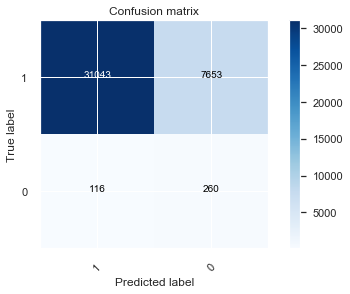

In [127]:
#Since Logistic regression works fine over Binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logit=LogisticRegression(class_weight='balanced')

logit.fit(X_train, y_train)
pred = logit.predict(X_test)
score = accuracy_score(y_test, pred)
score_2=logit.score(X_train, y_train)
print("Train accuracy:   %0.3f" % score_2)
print("Test accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=[1,0])

In [128]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     38696
           1       0.03      0.69      0.06       376

    accuracy                           0.80     39072
   macro avg       0.51      0.75      0.48     39072
weighted avg       0.99      0.80      0.88     39072



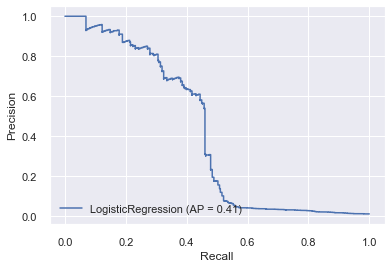

In [129]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(logit, X_test, y_test)

In [130]:
from sklearn.metrics import precision_score,f1_score,recall_score

print("Precision : ",precision_score(y_test, pred))
print("Recall : ",recall_score(y_test, pred))
print("F1 : ",f1_score(y_test, pred))

Precision :  0.03285732339188677
Recall :  0.6914893617021277
F1 :  0.06273374351550247


In [131]:
#Plotting Roc_Auc Curve

def plot_roc_curve(y_train_actual,train_pred_prob,y_test_actual,test_pred_prob,*args):
    AUC_train=roc_auc_score(y_train_actual,train_pred_prob)
    AUC_test=roc_auc_score(y_test_actual,test_pred_prob)
    
    if len(args)==0:
        print("AUC_Train : ",AUC_train)
        print("AUC_Test : ",AUC_test)
        fpr,tpr,threshold=roc_curve(y_train_actual,train_pred_prob)
        fpr_tst,tpr_tst,threshold=roc_curve(y_test_actual,test_pred_prob)
        roc_plot(fpr, tpr, fpr_tst, tpr_tst)
        
    else:
        AUC_Valid = roc_auc_score(args[0], args[1])
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        print("Validation AUC = ", AUC_Valid)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        fpr_val, tpr_val, thresholds = roc_curve(args[0], args[1])
        roc_plot(fpr, tpr, fpr_tst, tpr_tst, fpr_val, tpr_val)

In [132]:
def roc_plot(fpr, tpr, fpr_tst, tpr_tst, *args):


    fig = plt.plot(fpr, tpr, label='Train')
    fig = plt.plot(fpr_tst, tpr_tst, label='Test')

    if len(args) == 0:
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    else:
        fig = plt.plot(args[0], args[1], label='Validation')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

AUC_Train :  0.8118790726315348
AUC_Test :  0.8278901497323381


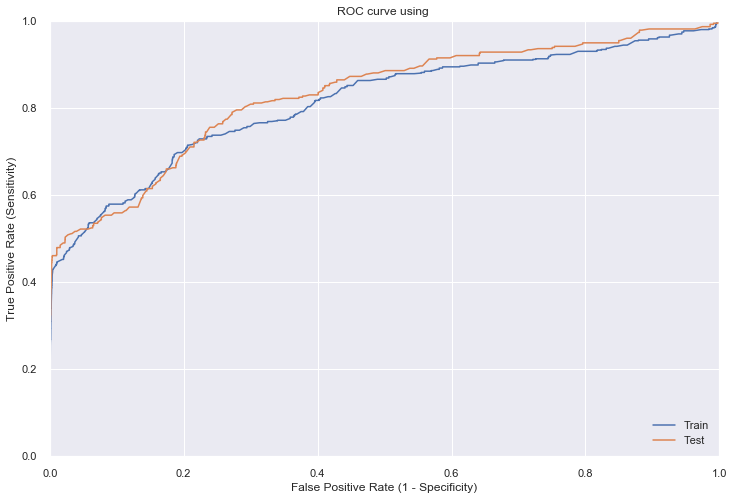

In [133]:
from sklearn.metrics import roc_curve,roc_auc_score
plt.subplots(figsize=(12, 8))
train_prob = logit.predict_proba(X_train)[:, 1]
test_prob = logit.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train, train_prob,
               y_test, test_prob)

In [134]:
# Since we have a class imbalance problem, we would use the SMOTE function for minority over sampling
#Synthetic Minority Over-sampling Technique
#it generates synthetic sample by oversampling the minority class with k nearest neighbours
import os
from imblearn.over_sampling import SMOTE

smote_X = X_train.copy()
smote_Y = y_train.copy()

os = SMOTE(random_state=0,k_neighbors=2)
os_smote_X, os_smote_Y = os.fit_sample(smote_X, smote_Y)

In [135]:
df_smote_X = pd.DataFrame(data = os_smote_X,columns=df_final.columns)
df_smote_Y = pd.DataFrame(data = os_smote_Y)

In [136]:
df_smote_Y['Label'].value_counts()

1    74934
0    74934
Name: Label, dtype: int64

Train accuracy:   0.752
Test accuracy:   0.824
Confusion matrix, without normalization


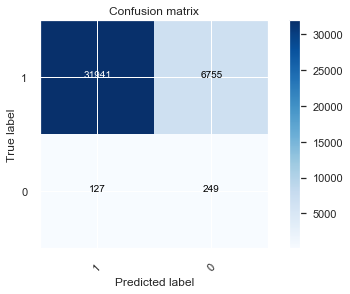

In [137]:
#Applying Logistic regression on balanced dataset
logit_smote=LogisticRegression(class_weight='balanced')

logit_smote.fit(os_smote_X, os_smote_Y)
pred = logit_smote.predict(X_test)
score = accuracy_score(y_test, pred)
score_2=logit_smote.score(os_smote_X, os_smote_Y)
print("Train accuracy:   %0.3f" % score_2)
print("Test accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=[1,0])

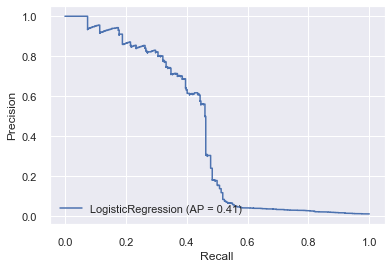

In [138]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(logit_smote, X_test, y_test)

In [139]:
from sklearn.metrics import precision_score,f1_score,recall_score

print("Precision : ",precision_score(y_test, pred))
print("Recall : ",recall_score(y_test, pred))
print("F1 : ",f1_score(y_test, pred))

Precision :  0.035551113649343234
Recall :  0.6622340425531915
F1 :  0.06747967479674796


AUC_Train :  0.8266149751144536
AUC_Test :  0.8286325707423715


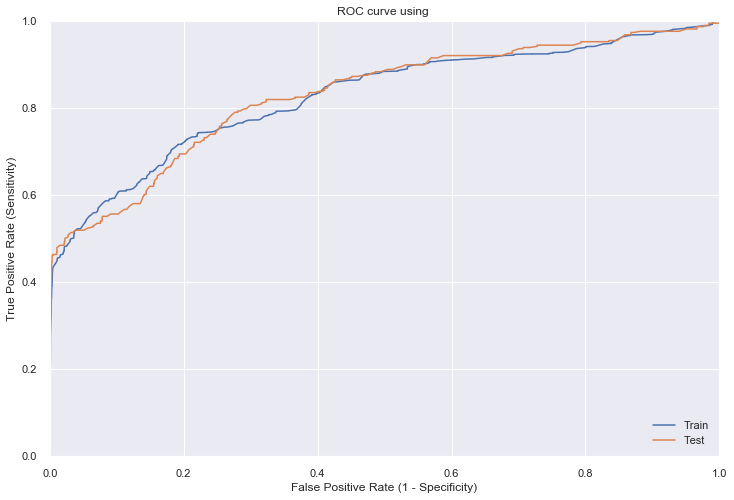

In [140]:
plt.subplots(figsize=(12, 8))
train_prob = logit_smote.predict_proba(os_smote_X)[:, 1]
test_prob = logit_smote.predict_proba(X_test)[:, 1]

plot_roc_curve(os_smote_Y, train_prob,
               y_test, test_prob)

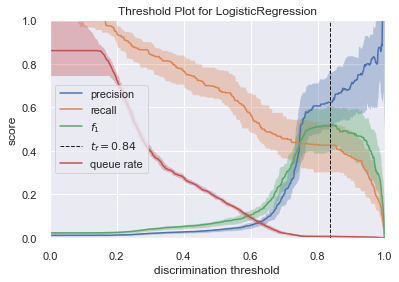

In [141]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(logit_smote)
visualizer.fit(X_test, y_test)
visualizer.poof()

In [56]:
#Checking Precision,Recall and F1 score at each level of threshold

from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,f1_score
pred_proba_df = pd.DataFrame(logit_smote.predict_proba(X_test)[:,1])

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8]
for i in threshold_list:
    print ('For i = {} '.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)  
    
    test_Precision = precision_score(y_test, Y_test_pred)
    test_Recall = accuracy_score(y_test, Y_test_pred)
    test_f1=f1_score(y_test, Y_test_pred)
    
    print('Precision {}'.format(test_Precision))
    print('Recall {}'.format(test_Recall))
    print('F1_Score {}'.format(test_f1))

    print(confusion_matrix(y_test, Y_test_pred))
    
    print("--------------------")




For i = 0.05 
Precision 0.009958599082466152
Recall 0.015630214706863946
F1_Score 0.019719714174929372
[[  206 35392]
 [    2   356]]
--------------------
For i = 0.1 
Precision 0.009976113530982156
Recall 0.02010790966737123
F1_Score 0.019753498594997632
[[  368 35230]
 [    3   355]]
--------------------
For i = 0.15 
Precision 0.010134842491265556
Recall 0.04636222049171209
F1_Score 0.020062301734731787
[[ 1316 34282]
 [    7   351]]
--------------------
For i = 0.2 
Precision 0.0103353722843282
Recall 0.08613305150739793
F1_Score 0.0204501416008347
[[ 2754 32844]
 [   15   343]]
--------------------
For i = 0.25 
Precision 0.013401894890274517
Recall 0.3215596840582935
F1_Score 0.02642081736909323
[[11231 24367]
 [   27   331]]
--------------------
For i = 0.3 
Precision 0.01855072463768116
Recall 0.5280898876404494
F1_Score 0.036347114947751016
[[18668 16930]
 [   38   320]]
--------------------
For i = 0.35 
Precision 0.022635970333745363
Recall 0.6463455334297474
F1_Score 0.0440

for threshold 0.75 ,we are getting descent values of Recall and Precision

In [142]:
## Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose, 
#either the best or worst performing feature
# The goal of RFE is to select features by recursively considering smaller and smaller sets of features.
from sklearn.feature_selection import RFE

rfe = RFE(logit_smote,30)
rfe = rfe.fit(os_smote_X, os_smote_Y)

In [143]:
idc_rfe = pd.DataFrame({"rfe_support": rfe.support_,
                       "ranking": rfe.ranking_})

idc_rfe['columns']=X_train.columns
idc_rfe.head()

,rfe_support,ranking,columns
0,True,1,feature1
1,False,34,feature2
2,True,1,feature3
3,True,1,feature4
4,False,24,feature5


In [144]:
#taking the significant columns based on rfe
sig_cols = idc_rfe[idc_rfe["rfe_support"]==True]["columns"].tolist()

In [145]:
#taking the columns from smote
train_rf_X = os_smote_X[sig_cols]
train_rf_Y = os_smote_Y
test_rf_X = X_test[sig_cols]
test_rf_Y = y_test

Train accuracy:   0.745
Test accuracy:   0.990
Confusion matrix, without normalization


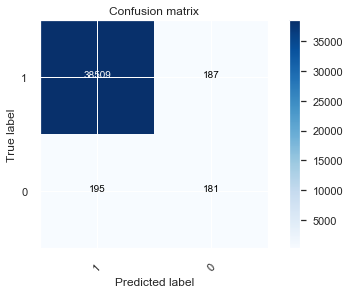

In [146]:
logit_rfe = LogisticRegression(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logit_rfe.fit(train_rf_X, train_rf_Y)
pred = logit_rfe.predict(test_rf_X)
score = accuracy_score(y_test, pred)
score_2=logit_rfe.score(train_rf_X, train_rf_Y)
print("Train accuracy:   %0.3f" % score_2)
print("Test accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=[1,0])

In [147]:
print("Precision : ",precision_score(y_test, pred))
print("Recall : ",recall_score(y_test, pred))
print("F1 : ",f1_score(y_test, pred))

Precision :  0.49184782608695654
Recall :  0.48138297872340424
F1 :  0.4865591397849462


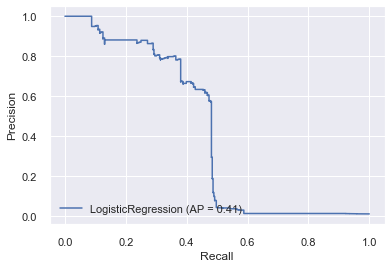

In [148]:
plot_precision_recall_curve(logit_rfe, test_rf_X, y_test)

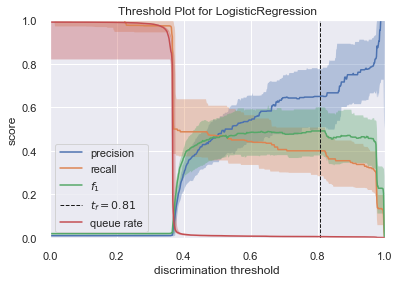

In [149]:
visualizer = DiscriminationThreshold(logit_rfe)
visualizer.fit(test_rf_X, y_test)
visualizer.poof()

#### Tree Based Algorithms

Train accuracy:   0.748
Test accuracy:   0.835
Confusion matrix, without normalization


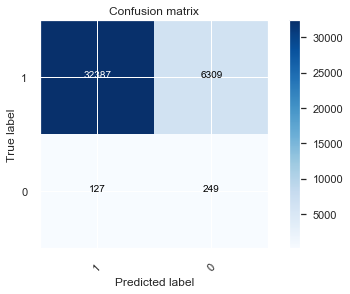

In [152]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(ccp_alpha=0.0, class_weight="balanced", criterion='gini',
                       max_depth=50, max_features='sqrt', max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

dtree.fit(os_smote_X, os_smote_Y) 


pred = dtree.predict(X_test)
score = accuracy_score(y_test, pred)
score_2=dtree.score(os_smote_X, os_smote_Y)
print("Train accuracy:   %0.3f" % score_2)
print("Test accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=[1,0])

In [153]:
print("Precision : ",precision_score(y_test, pred))
print("Recall : ",recall_score(y_test, pred))
print("F1 : ",f1_score(y_test, pred))

Precision :  0.03796889295516926
Recall :  0.6622340425531915
F1 :  0.07182001730602827


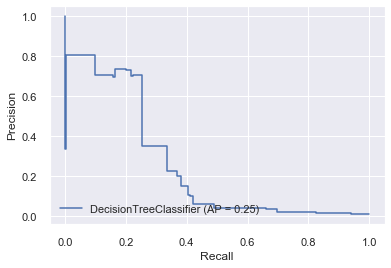

In [154]:
plot_precision_recall_curve(dtree, X_test, y_test)

Train accuracy:   0.869
Test accuracy:   0.857
Confusion matrix, without normalization


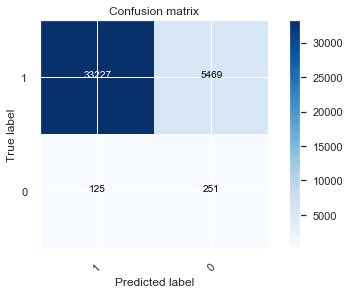

In [155]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=1200, max_depth=25, bootstrap=False, n_jobs=-1,min_samples_split=10,
    min_samples_leaf=30,class_weight='balanced',max_features='sqrt')


#rfc.fit(os_smote_X, os_smote_Y)
rfc.fit(X_train,y_train)   #fitting original values


pred = rfc.predict(X_test)
score = accuracy_score(y_test, pred)
score_2=rfc.score(X_train,y_train)
print("Train accuracy:   %0.3f" % score_2)
print("Test accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=[1,0])

In [156]:
print("Precision : ",precision_score(y_test, pred))
print("Recall : ",recall_score(y_test, pred))
print("F1 : ",f1_score(y_test, pred))

Precision :  0.04388111888111888
Recall :  0.6675531914893617
F1 :  0.0823490813648294


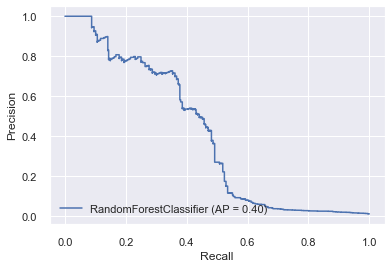

In [158]:
plot_precision_recall_curve(rfc, X_test, y_test)

Some classification models have built-in approaches combatting class imbalance. For instance,Boosting Machines (GBM) deals with class imbalance by constructing successive training sets based on incorrectly classified examples. It usually outperforms Random Forest on imbalanced datase

Train accuracy:   0.992
Test accuracy:   0.992
Confusion matrix, without normalization


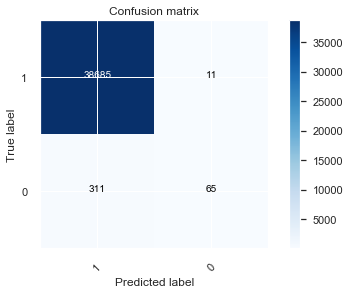

In [230]:
from sklearn.ensemble import GradientBoostingClassifier

gbm=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=5,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#manually tuned the hyperparameters of the model such as learning rate,estimators,max leaf nodes,max dept,loss

gbm.fit(X_train,y_train)


pred = gbm.predict(X_test)
score = accuracy_score(y_test, pred)
score_2=gbm.score(X_train,y_train)
print("Train accuracy:   %0.3f" % score_2)
print("Test accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=[1,0])

In [231]:
print("Precision : ",precision_score(y_test, pred))
print("Recall : ",recall_score(y_test, pred))
print("F1 : ",f1_score(y_test, pred))

Precision :  0.8552631578947368
Recall :  0.17287234042553193
F1 :  0.2876106194690265


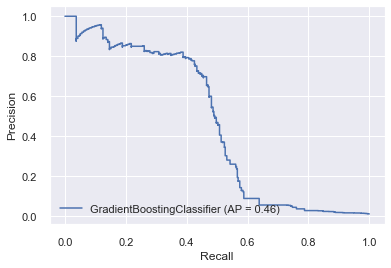

In [232]:
plot_precision_recall_curve(gbm, X_test, y_test)

Train accuracy:   0.995
Test accuracy:   0.993
Confusion matrix, without normalization


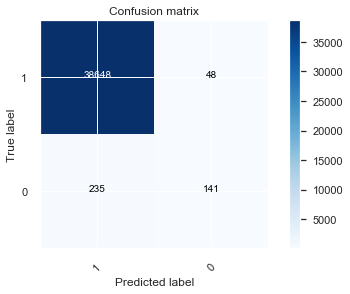

In [233]:
import xgboost as xgb
xgb=xgb.XGBClassifier(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=6, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1,class_weight="balanced")

xgb.fit(X_train,y_train)


pred = xgb.predict(X_test)
score = accuracy_score(y_test, pred)
score_2=xgb.score(X_train,y_train)
print("Train accuracy:   %0.3f" % score_2)
print("Test accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=[1,0])

In [234]:
print("Precision : ",precision_score(y_test, pred))
print("Recall : ",recall_score(y_test, pred))
print("F1 : ",f1_score(y_test, pred))

Precision :  0.746031746031746
Recall :  0.375
F1 :  0.49911504424778763


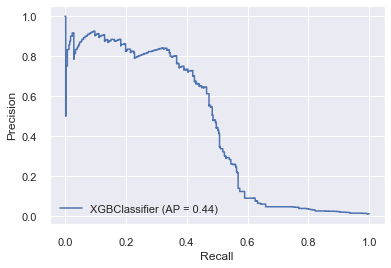

In [235]:
plot_precision_recall_curve(xgb, X_test, y_test)

#### Feature Importances of DecisionTress , RandomForest , Gbm and Xgboost

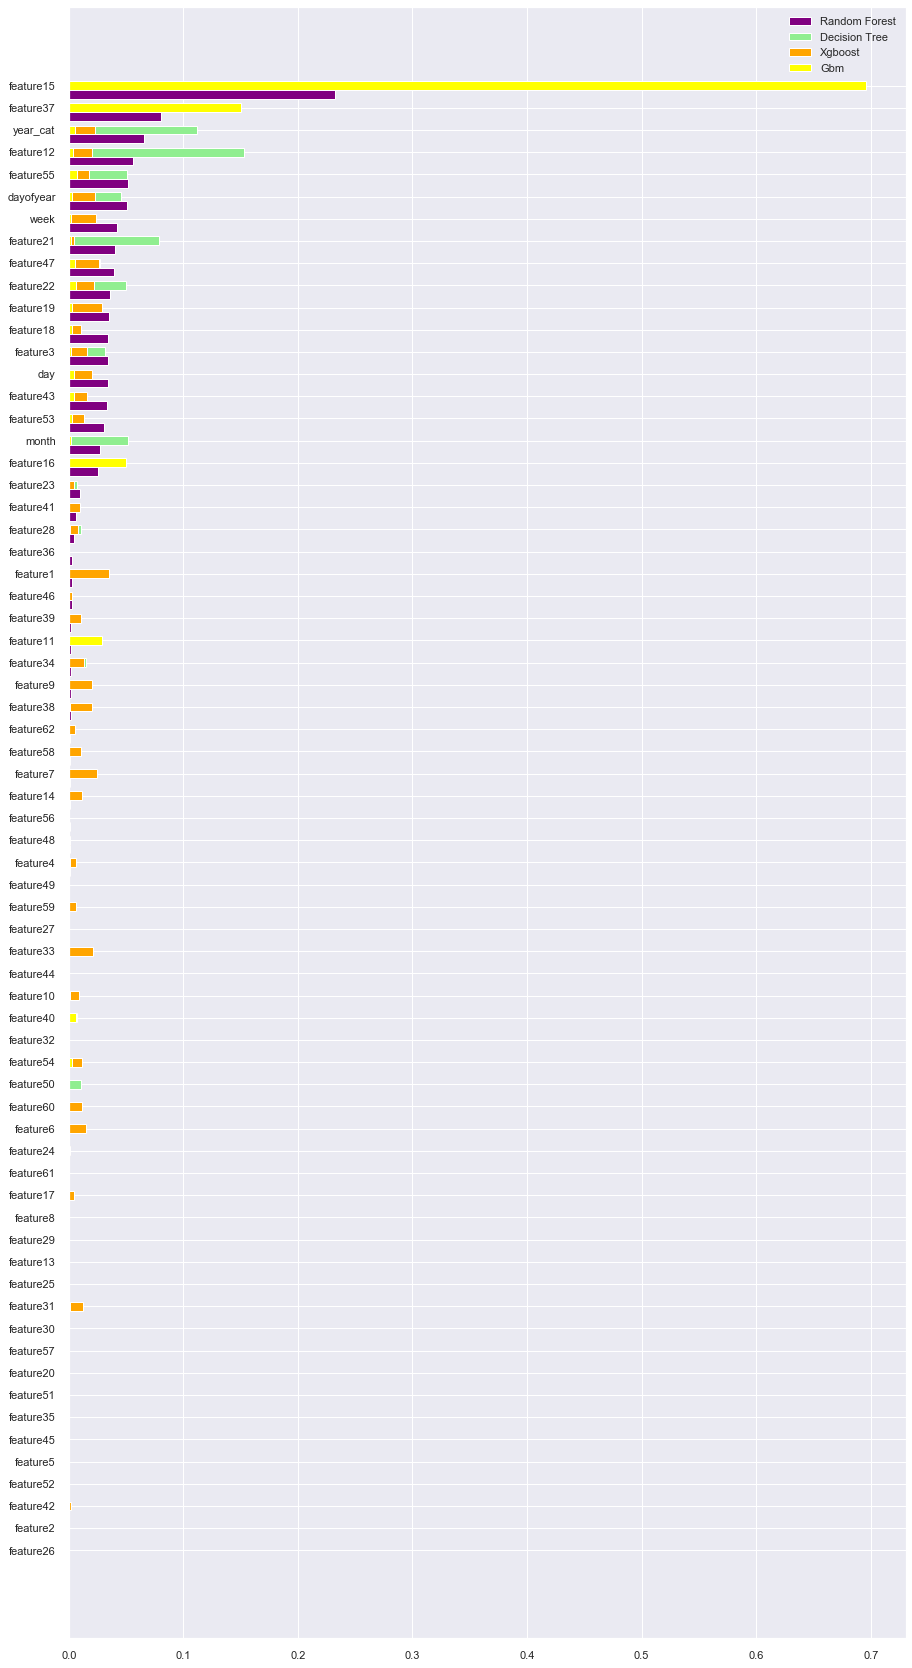

In [189]:
feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_,'dt':dtree.feature_importances_,
                                 'xgb':xgb.feature_importances_,'gbm':gbm.feature_importances_},index=X_train.columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(15,30))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
xgb_feature=ax.barh(index+0.4,feature_importance['xgb'],0.4,color='orange',label='Xgboost')
gbm_feature=ax.barh(index+0.4,feature_importance['gbm'],0.4,color='yellow',label='Gbm')


ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

#### Picking up top features

In [193]:
#picking up top 20 features by RandomForest,GradientBoosting and XgBoost
top_xgb=feature_importance['xgb'].sort_values(ascending=False)[:20].index.tolist()
top_gbm=feature_importance['gbm'].sort_values(ascending=False)[:20].index.tolist()
top_rfc=feature_importance['rfc'].sort_values(ascending=False)[:20].index.tolist()


xgb_X_train=X_train[top_xgb]
gbm_X_train=X_train[top_gbm]
rfc_X_train=X_train[top_xgb]

xgb_X_test=X_test[top_xgb]
gbm_X_test=X_test[top_gbm]
rfc_X_test=X_test[top_xgb]


#Creating a funtion to check the model
def Prediction_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test, pred)
    score_2=model.score(X_train,y_train)
    print("Train accuracy:   %0.3f" % score_2)
    print("Test accuracy:   %0.3f" % score)
    cm = confusion_matrix(y_test, pred)
    plot_confusion_matrix(cm, classes=[1,0])
    
    print("Precision : ",precision_score(y_test, pred))
    print("Recall : ",recall_score(y_test, pred))
    print("F1 : ",f1_score(y_test, pred))
    
    plot_precision_recall_curve(model, X_test, y_test)

Train accuracy:   0.993
Test accuracy:   0.993
Confusion matrix, without normalization
Precision :  0.8106508875739645
Recall :  0.36436170212765956
F1 :  0.5027522935779816


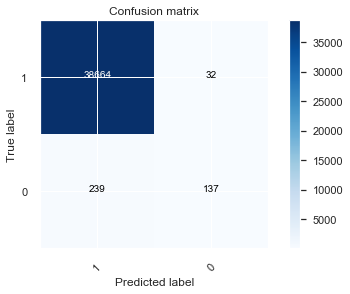

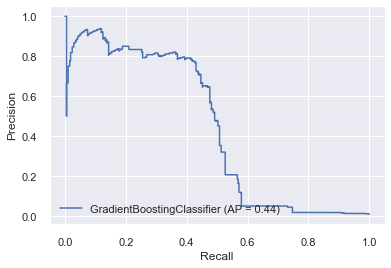

In [194]:
gbm2=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=5,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Prediction_model(gbm2,gbm_X_train,y_train,gbm_X_test,y_test)

Train accuracy:   0.995
Test accuracy:   0.993
Confusion matrix, without normalization
Precision :  0.7526315789473684
Recall :  0.3803191489361702
F1 :  0.5053003533568904


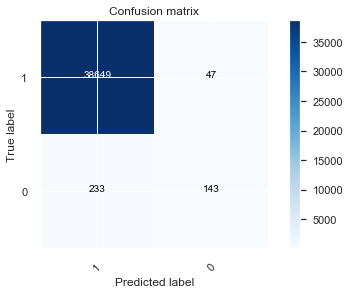

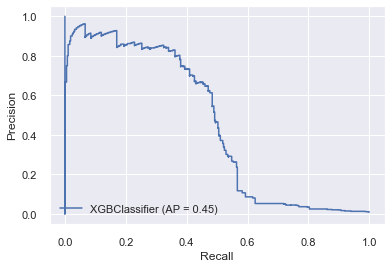

In [203]:
import xgboost as xgb
xgb2=xgb.XGBClassifier(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=3, missing=None, n_estimators=400,
             n_jobs=-1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1,class_weight="balanced")

Prediction_model(xgb2,xgb_X_train,y_train,xgb_X_test,y_test)

#we can also run a grid search or randamized search cv with selected features

#### Preparing Test data 

In [204]:
display_all(df_test.head())

,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,Label
0,105049,2018-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,105049,2018-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,105049,2018-09-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,105049,2018-09-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,105049,2018-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [205]:
df_test['month']=df_test['week_start_date'].dt.month

df_test['week']=df_test['week_start_date'].dt.week

df_test['day']=df_test['week_start_date'].dt.day

df_test['dayofyear']=df_test['week_start_date'].dt.dayofyear

df_test['year_cat']=df_test['week_start_date'].dt.year.map({2018:1,2019:2,2020:3})

df_test.drop(['account_id','week_start_date'],axis=1,inplace=True)

In [206]:
minmax_scaled_test = scaler.fit_transform(df_test.drop(['month','year_cat'],axis=1))
df_finaltest = pd.DataFrame(minmax_scaled_test, columns=df_test.drop(['month','year_cat'],axis=1).columns)
df_finaltest['month']=df_test['month']
df_finaltest['year_cat']=df_test['year_cat']
display_all(df_finaltest.head())

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,Label,week,day,dayofyear,month,year_cat
0,0.140185,0.375,0.000896,0.333333,0.333333,0.093264,0.019277,0.333333,0.003171,0.069486,0.333333,0.00813,0.204082,0.031019,0.153846,0.172414,0.272727,0.024226,0.001905,0.090909,0.003704,0.02112,0.011696,0.2,0.300553,0.181818,0.02829,0.076336,0.195402,0.142857,0.428571,0.013005,0.119936,0.159091,0.272727,0.00953,0.333333,0.034562,0.051071,0.333333,0.030608,0.4,0.033674,0.20442,0.285714,0.05618,0.000462,0.214286,0.030272,0.148649,0.333333,0.230769,0.003259,0.105058,0.020343,0.012723,0.3,0.025412,0.062817,0.055556,0.060168,0.009365,0.0,0.686275,0.066667,0.668524,9,1
1,0.140185,0.375,0.000896,0.333333,0.333333,0.093264,0.019277,0.333333,0.003171,0.069486,0.333333,0.00813,0.204082,0.031019,0.153846,0.172414,0.272727,0.024226,0.001905,0.090909,0.003704,0.02112,0.011696,0.2,0.300553,0.181818,0.02829,0.076336,0.195402,0.142857,0.428571,0.013005,0.119936,0.159091,0.272727,0.00953,0.333333,0.034562,0.051071,0.333333,0.030608,0.4,0.033674,0.20442,0.285714,0.05618,0.000462,0.214286,0.030272,0.148649,0.333333,0.230769,0.003259,0.105058,0.031150,0.012723,0.3,0.025412,0.062817,0.055556,0.060168,0.009365,0.0,0.705882,0.300000,0.688022,9,1
2,0.140185,0.375,0.000896,0.333333,0.333333,0.093264,0.019277,0.333333,0.003171,0.069486,0.333333,0.00813,0.204082,0.031019,0.153846,0.172414,0.272727,0.024226,0.001905,0.090909,0.003704,0.02112,0.011696,0.2,0.300553,0.181818,0.02829,0.076336,0.195402,0.142857,0.428571,0.013005,0.119936,0.159091,0.272727,0.00953,0.333333,0.034562,0.051071,0.333333,0.030608,0.4,0.033674,0.20442,0.285714,0.05618,0.000462,0.214286,0.030272,0.148649,0.333333,0.230769,0.003259,0.105058,0.020343,0.012723,0.3,0.025412,0.062817,0.055556,0.060168,0.009365,0.0,0.725490,0.533333,0.707521,9,1
3,0.140185,0.375,0.000896,0.333333,0.333333,0.093264,0.019277,0.333333,0.003171,0.069486,0.333333,0.00813,0.204082,0.031019,0.153846,0.172414,0.272727,0.024226,0.001905,0.090909,0.003704,0.02112,0.011696,0.2,0.300553,0.181818,0.02829,0.076336,0.195402,0.142857,0.428571,0.013005,0.119936,0.159091,0.272727,0.00953,0.333333,0.034562,0.051071,0.333333,0.030608,0.4,0.033674,0.20442,0.285714,0.05618,0.000462,0.214286,0.030272,0.148649,0.333333,0.230769,0.003259,0.105058,0.020343,0.012723,0.3,0.025412,0.062817,0.055556,0.060168,0.009365,0.0,0.745098,0.766667,0.727019,9,1
4,0.140185,0.375,0.000896,0.333333,0.333333,0.093264,0.019277,0.333333,0.003171,0.069486,0.333333,0.00813,0.204082,0.031019,0.153846,0.172414,0.272727,0.024226,0.001905,0.090909,0.003704,0.02112,0.011696,0.2,0.300553,0.181818,0.02829,0.076336,0.195402,0.142857,0.428571,0.013005,0.119936,0.159091,0.272727,0.00953,0.333333,0.034562,0.051071,0.333333,0.030608,0.4,0.033674,0.20442,0.285714,0.05618,0.000462,0.214286,0.030272,0.148649,0.333333,0.230769,0.003259,0.105058,0.020343,0.012723,0.3,0.025412,0.062817,0.055556,0.060168,0.009365,0.0,0.764706,0.000000,0.746518,10,1


In [207]:
#complete data without feature selection
X_test_final=df_finaltest.drop(['Label'],axis=1)
y_test_final=df_finaltest['Label'].astype(int)

X_test_final = X_test_final[X_test.columns] #maping the orientation of columns of X_test_final with X_test

In [208]:
X_test_final.shape ,y_test_final.shape

((29620, 67), (29620,))

In [209]:
#Preparing complete training set 
X_train_final=df_final.drop(['Label','account_id'],axis=1)
y_train_final=df_final[['Label']]

smote_X = X_train_final.copy()
smote_Y = y_train_final.copy()

os = SMOTE(random_state=0)
final_smote_x,final_smote_y = os.fit_sample(smote_X, smote_Y)

#Running a grid search or RandamisedSearch over complete training data gives more accuracy in terms of precision and recall
#with feature_importances_ from respected model

In [210]:
#logit_smote.fit(final_smote_x,final_smote_y)

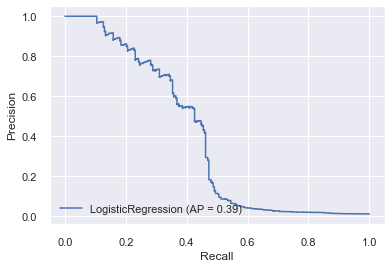

In [244]:
logit_smote.predict(X_test_final)
plot_precision_recall_curve(logit_smote, X_test_final, y_test_final)

In [247]:
print("Precision : ",precision_score(y_test_final, logit_smote.predict(X_test_final)))
print("Recall : ",recall_score(y_test_final, logit_smote.predict(X_test_final)))
print("F1 : ",f1_score(y_test_final, logit_smote.predict(X_test_final)))

Precision :  0.2869757174392936
Recall :  0.4693140794223827
F1 :  0.35616438356164387


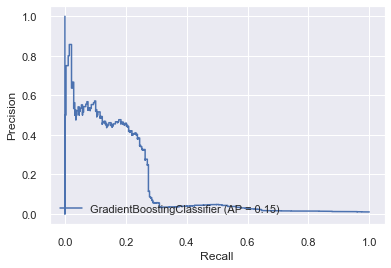

In [240]:
gbm.predict(X_test_final)
plot_precision_recall_curve(gbm, X_test_final, y_test_final)

In [248]:
#Since class imbalance is controlled by smote,on test dataset Logistic regression gives descent precision and recall score

#we can perform hyperparameter optimization using each model on complete dataset

In [250]:
#Checking Precision,Recall and F1 score at threshold 0.75 on test data
pred_proba_df = pd.DataFrame(logit_smote.predict_proba(X_test_final)[:,1])
Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>0.75 else 0)  
    
test_Precision = precision_score(y_test_final, Y_test_pred)
test_Recall = accuracy_score(y_test_final, Y_test_pred)
test_f1=f1_score(y_test_final, Y_test_pred)
    
print('Precision {}'.format(test_Precision))
print('Recall {}'.format(test_Recall))
print('F1_Score {}'.format(test_f1))


Precision 0.5431472081218274
Recall 0.9912221471978393
F1_Score 0.4514767932489452
